In [154]:
NAME = "DUCROCQ Romain"

# Homework : Time Series

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline


In [156]:
obj_trouves = pd.read_csv('data/objets-trouves-restitution.csv',sep = ';',parse_dates=True, index_col = 'Date')


In [157]:
obj_trouves.head()

,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
Date,,,,,,
2017-06-20 16:05:25+02:00,NaN,Nîmes,87775007.0,"Sac de voyage, sac de sport, sac à bandoulière","Bagagerie: sacs, valises, cartables",Objet trouvé
2017-08-10 17:33:37+02:00,2017-08-11T16:13:06+02:00,Boulogne Ville,87317586.0,Téléphone portable,"Appareils électroniques, informatiques, appare...",Objet trouvé
2017-07-03 10:57:43+02:00,NaN,Nîmes,87775007.0,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
2017-08-11 09:26:05+02:00,2017-08-11T16:16:52+02:00,Dijon,87713040.0,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
2017-07-11 10:13:04+02:00,NaN,Nîmes,87775007.0,"Clés, porte-clés","Clés, porte-clés, badge magnétique",Objet trouvé


In [158]:
len(obj_trouves)

388268

In [159]:
df_sample1=obj_trouves.sample(frac=0.1, replace=True, random_state=1)
len(df_sample1)


38827

In [160]:
df_sample2=obj_trouves.sample(frac=0.05, replace=True, random_state=1)
len(df_sample2)

19413

In [161]:
df_sample1.to_csv('data/objets-trouves-restitution_Sample1.csv', index = True)

In [162]:
df_sample2.to_csv('data/objets-trouves-restitution_Sample2.csv', index = True)

In [163]:
obj_trouves['Type d\'enregistrement'].value_counts()

Objet trouvé    388268
Name: Type d'enregistrement, dtype: int64

## we can delete the column Type d'enregistrement 



In [164]:
obj_trouves.drop('Type d\'enregistrement',axis=1, inplace=True)


## Q1: Modify dates in index from 'YYYY-MM-DD HH:MM:SS' format to 'YYYY-MM-DD' format 
- Ex: 2017-07-03 08:57:43 --> 2017-07-03
- Save the result in place(I mean indexes of obj_trouves must be changed)

Be careful to keep DateTimeIndex, you can do obj_trouves.index = pd.to_datetime(obj_trouves.index)

In [165]:

obj_trouves.index = pd.to_datetime(obj_trouves.index,utc=True)
obj_trouves.index =  pd.to_datetime(obj_trouves.index.date)
obj_trouves.index.name='Date'


obj_trouves.head()
#obj_trouves.index.date

,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets
Date,,,,,
2017-06-20,NaN,Nîmes,87775007.0,"Sac de voyage, sac de sport, sac à bandoulière","Bagagerie: sacs, valises, cartables"
2017-08-10,2017-08-11T16:13:06+02:00,Boulogne Ville,87317586.0,Téléphone portable,"Appareils électroniques, informatiques, appare..."
2017-07-03,NaN,Nîmes,87775007.0,Sac à dos,"Bagagerie: sacs, valises, cartables"
2017-08-11,2017-08-11T16:16:52+02:00,Dijon,87713040.0,Sac à dos,"Bagagerie: sacs, valises, cartables"
2017-07-11,NaN,Nîmes,87775007.0,"Clés, porte-clés","Clés, porte-clés, badge magnétique"


In [166]:
obj_trouves.index.day

Int64Index([20, 10,  3, 11, 11, 18, 11, 11, 11, 28,
            ...
            29,  4,  5,  2, 25,  5,  4,  3,  5, 17],
           dtype='int64', name='Date', length=388268)

In [167]:
obj_trouves['2013-05-24']
#obj_trouves.tail()



,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets
Date,,,,,
2013-05-24,NaN,Strasbourg,87212027.0,Carte d'abonnement,Pièces d'identités et papiers personnels
2013-05-24,NaN,Strasbourg,87212027.0,Autres divers (préciser),Divers
2013-05-24,NaN,Strasbourg,87212027.0,Téléphone portable,"Appareils électroniques, informatiques, appare..."
2013-05-24,NaN,Paris Saint-Lazare,87384008.0,"Article de papéterie, stylo, classeur","Livres, articles de papéterie"
2013-05-24,NaN,Paris Saint-Lazare,87384008.0,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures"
2013-05-24,NaN,Paris Saint-Lazare,87384008.0,"Foulard, écharpe","Vêtements, chaussures"
2013-05-24,2013-05-27T09:38:56+02:00,Strasbourg,87212027.0,"Appareil photo, caméscope/caméras et accessoires","Appareils électroniques, informatiques, appare..."
2013-05-24,NaN,Paris Saint-Lazare,87384008.0,"Sac de voyage, sac de sport, sac à bandoulière","Bagagerie: sacs, valises, cartables"
2013-05-24,NaN,Paris Saint-Lazare,87384008.0,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres"


## Q2: Pivot obj_trouves to get a new dataframe with hierarchical indexing : Date and station (Gare) (BE CAREFUL OF THE ORDER)
The values are the number of found objects per station for each Date (if at least one object is lost)

Hints:
- Use only one column, 'Type d'objets' or 'Nature d'objet' 
- Use the aggregate function len to count the number of found objects

Number_found_objects  = string.count(substring)

In [168]:
pivoted_obj_trouves = pd.pivot_table(obj_trouves, index=['Date','Gare'],values=['Nature d\'objets'],aggfunc=len)


pivoted_obj_trouves

Nature d'objets
Date       Gare                                             
2013-05-24 Aéroport Charles de Gaulle 2 TGV                1
           Paris Saint-Lazare                              8
           Strasbourg                                      8
2013-05-25 Strasbourg                                      9
2013-05-26 Strasbourg                                      2
...                                                      ...
2017-11-05 Paris Gare de Lyon                              3
           Quimper                                         1
           Rennes                                         14
           Strasbourg                                      3
           Toulon                                          1

[76241 rows x 1 columns]

## Q3: Change the name of the column to 'Nb of found objects'



In [169]:
pivoted_obj_trouves = pivoted_obj_trouves.rename(columns = {'Nature d\'objets':'Nb of found objects'})

pivoted_obj_trouves

Nb of found objects
Date       Gare                                                 
2013-05-24 Aéroport Charles de Gaulle 2 TGV                    1
           Paris Saint-Lazare                                  8
           Strasbourg                                          8
2013-05-25 Strasbourg                                          9
2013-05-26 Strasbourg                                          2
...                                                          ...
2017-11-05 Paris Gare de Lyon                                  3
           Quimper                                             1
           Rennes                                             14
           Strasbourg                                          3
           Toulon                                              1

[76241 rows x 1 columns]

## Q4: Get the date and the station with the greatest number of found objects (Find this greatest number as well)

In [170]:
max_found_obj = pivoted_obj_trouves.loc[pivoted_obj_trouves.sort_values('Nb of found objects').tail(1).index]

max_found_obj

,,Nb of found objects
Date,Gare,
2017-09-26,Paris Gare de Lyon,121


## Q5: Print a barplot showing number of found objects per station for the date found in Q4

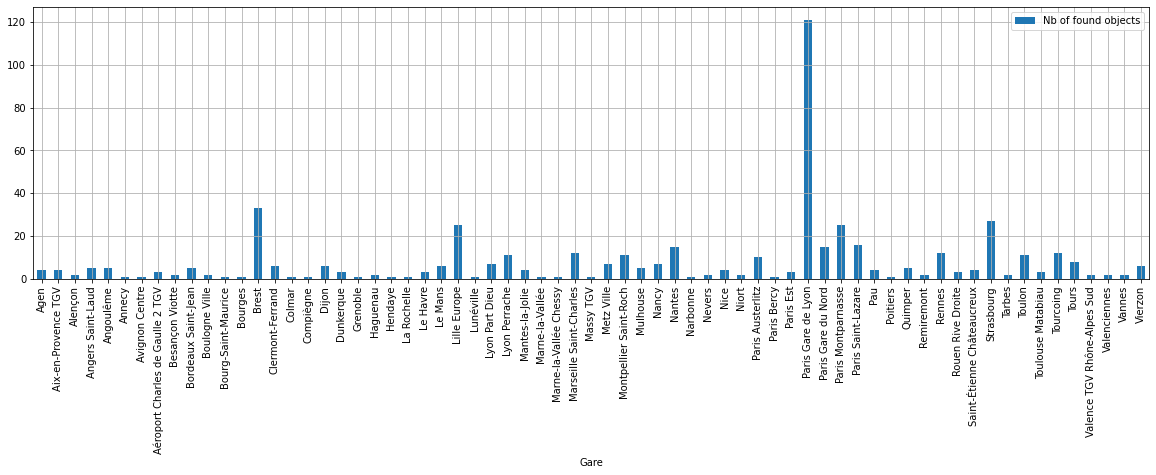

In [171]:
pivoted_obj_trouves.loc[max_found_obj.index[0][0]].plot(
    kind="bar",
    grid="true",
    figsize=(20,5)
)

## Q6: Create a new dataframe indexed by the type of objects with one column for the numbers of found objects for each type in 2016

In [172]:
nb_found_objects_by_type_2016 = pd.pivot_table(obj_trouves.loc[obj_trouves.index.year == 2016], index=['Type d\'objets'],values=['Nature d\'objets'],aggfunc=len)

nb_found_objects_by_type_2016

,Nature d'objets
Type d'objets,
"Appareils électroniques, informatiques, appareils photo",13603
"Articles d'enfants, de puériculture",1227
"Articles de sport, loisirs, camping",1143
Articles médicaux,621
"Bagagerie: sacs, valises, cartables",27197
"Bijoux, montres",962
"Clés, porte-clés, badge magnétique",5031
Divers,1839
Instruments de musique,229


## Q7 Plot a decreasing bar chart of the number of founds objects regarding types from the dataframe made in Q6

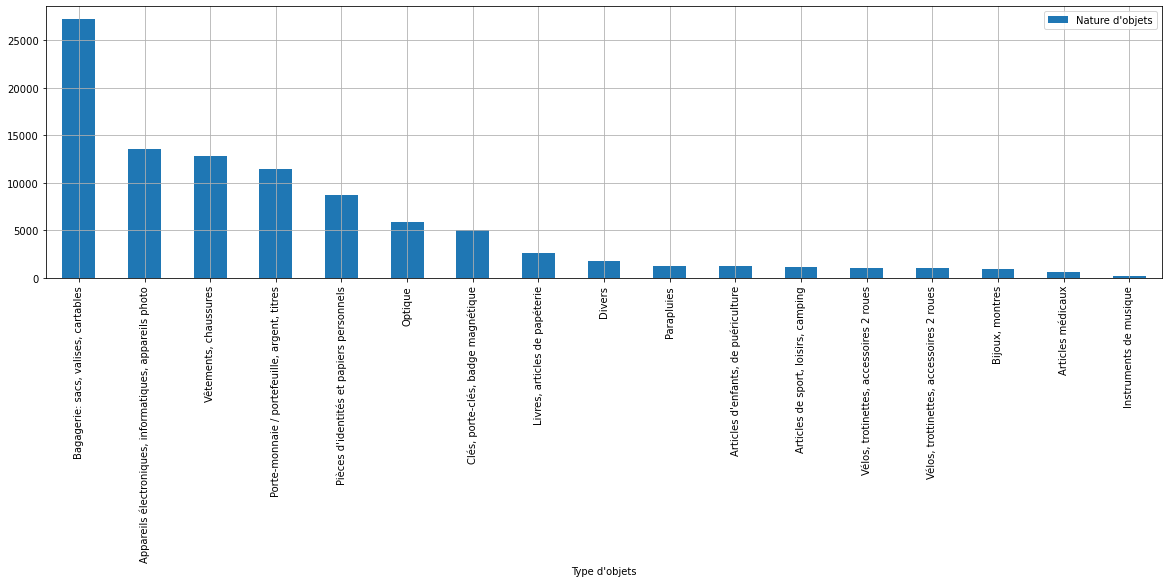

In [173]:
nb_found_objects_by_type_2016.sort_values('Nature d\'objets', ascending=False).plot(
    kind="bar",
    grid="true",
    figsize=(20,5)
)

In [174]:
stores = pd.read_csv("data/SuperstoreSales.csv", encoding="latin1", parse_dates=["Order Date"])
stores.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/10
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/12
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D¨ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/12
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/11
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/10


## Q8: Create a pivot table to analyse sales regarding Customer Segments and product categories  

We are intersted by different indicators : number of sales, median and sum of sales 

Hint : use one index, one column, one value and three aggfunc

In [175]:
analyse_sales = pd.pivot_table(stores, 
                               index=['Customer Segment'], 
                               columns=['Product Category'], 
                               values=['Sales'],
                               aggfunc=[len, sum, np.median])

analyse_sales

len                                     sum  \
                     Sales                                   Sales   
Product Category Furniture Office Supplies Technology    Furniture   
Customer Segment                                                     
Consumer             358.0           865.0      426.0  1128807.214   
Corporate            633.0          1680.0      763.0  1862840.574   
Home Office          406.0          1145.0      481.0  1285345.918   
Small Business       327.0           920.0      395.0   901596.836   

                                                  median                  \
                                                   Sales                   
Product Category Office Supplies    Technology Furniture Office Supplies   
Customer Segment                                                           
Consumer               691382.23  1.243422e+06  1366.373         207.190   
Corporate             1341315.63  2.294749e+06  1323.670         205.475   
Home Office            960054.41  1.319364e+06  1571.980         223.640   
Small Business         760009.83  1.126714e+06  1217.620         202.475   

                             
                             
Product Category Technology  
Customer Segment             
Consumer           1074.065  
Corporate          1313.640  
Home Office        1298.290  
Small Business     1383.919

## Q9: Plot 3 bar plots, one for each indicator (number of sales, median, sum)

Each graph will have three bars representing product categories for each customer segment 

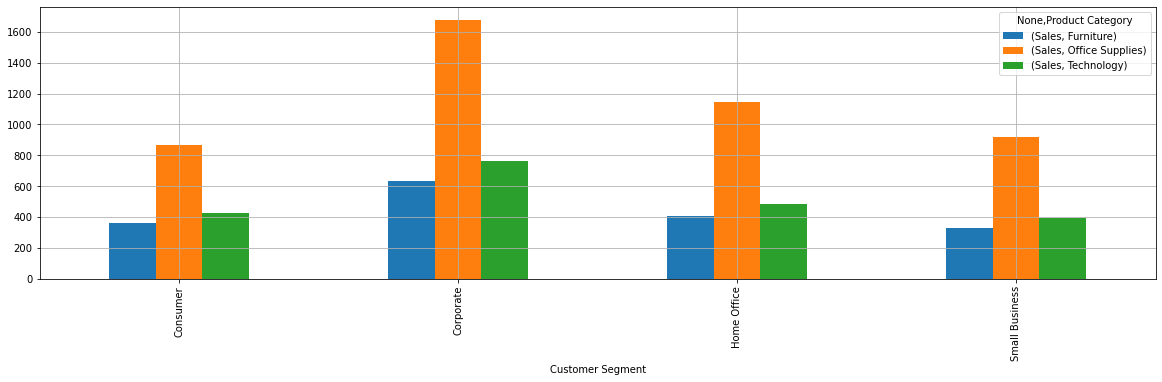

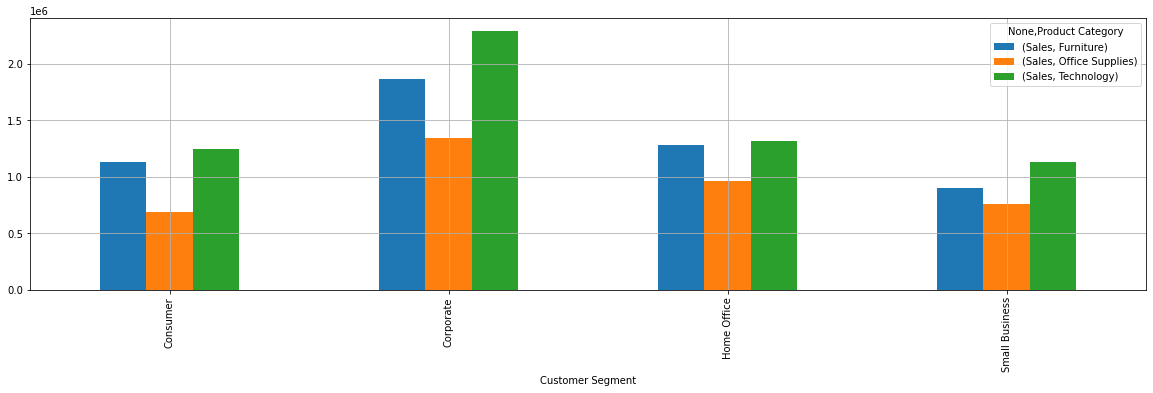

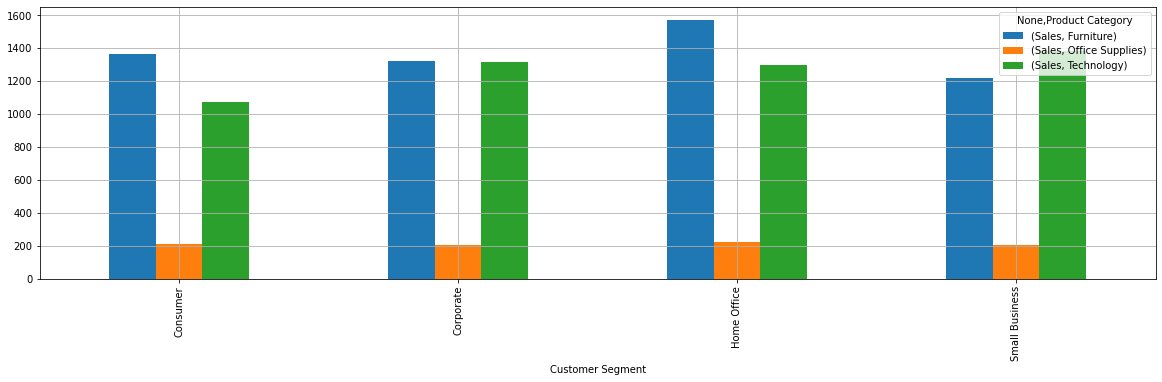

In [176]:
analyse_sales['len'].plot(
    kind="bar",
    grid="true",
    figsize=(20,5)
)
analyse_sales['sum'].plot(
    kind="bar",
    grid="true",
    figsize=(20,5)
)
analyse_sales['median'].plot(
    kind="bar",
    grid="true",
    figsize=(20,5)
)